<a href="https://colab.research.google.com/github/lookmeebbear/GeoAI_DOL/blob/main/GeoAI_DOL_LandcoverClassification_HardCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Automatic Land Cover Classification by Rasterio + Scikit-Learn**


Thepchai Srinoi

Department of Survey Engineering

Faculty of Engineering Chulalongkorn University

-------------------------------------------------------------

download + install library ...

In [ ]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 16.7 MB/s eta 0:00:00


activate google earth engine

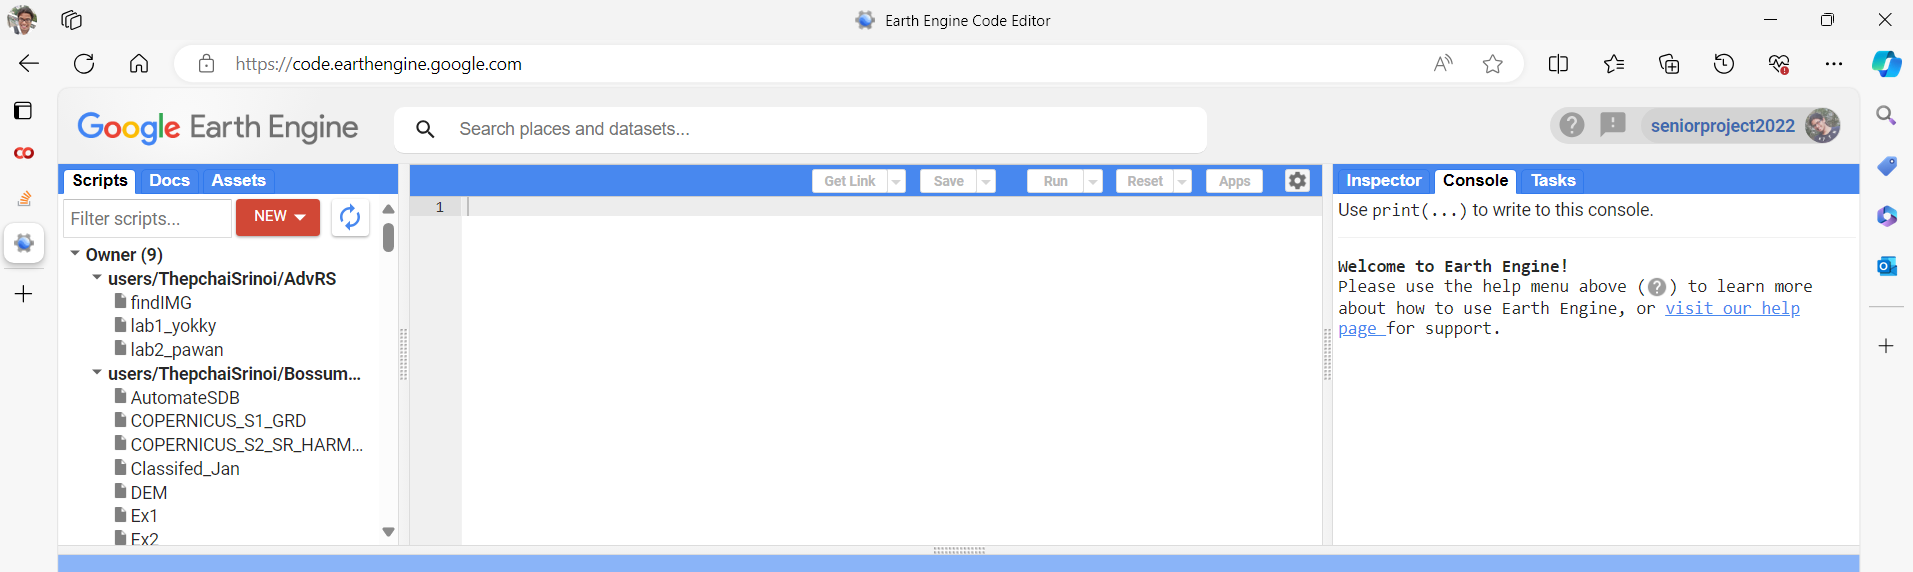

In [ ]:
import ee
# Authenticate to the Earth Engine servers
ee.Authenticate()
# Initialize the API
ee.Initialize(project='seniorproject2022')

In [ ]:
import folium
# Install Function for Cloud Mask
def maskS2clouds(image) :
  qa = image.select('QA60')

  # Bits 10 and 11 are clouds and cirrus, respectively.
  cloudBitMask = 1 << 10
  cirrusBitMask = 1 << 11

  # Both flags should be set to zero, indicating clear conditions.
  mask = (qa.bitwiseAnd(cloudBitMask).eq(0)) and (qa.bitwiseAnd(cirrusBitMask).eq(0))

  return image.updateMask(mask).divide(10000)

# Map Visualization : Google Earth Engine
def add_ee_layer(self, ee_image_object, vis_params, name):
  map_id_dict = ee.Image(ee_image_object).getMapId(vis_params)
  folium.raster_layers.TileLayer(
      tiles=map_id_dict['tile_fetcher'].url_format,
      attr='Map Data &copy; <a href="https://earthengine.google.com/">Google Earth Engine</a>',
      name=name,
      overlay=True,
      control=True
  ).add_to(self)

In [ ]:
# Retrieve satellite image
lat_min, lat_max, lon_min, lon_max = (13.920, 14.000, 100.4, 100.55)
AOI = ee.Geometry.Polygon(
        [[[lon_min, lat_max],
           [lon_min, lat_min],
           [lon_max, lat_min],
           [lon_max, lat_max]]])

fromdate = '2022-01-01'
todate = '2022-02-01'

myimage = ee.ImageCollection('COPERNICUS/S2_SR_HARMONIZED').filterDate(fromdate,todate).\
            filterMetadata('CLOUDY_PIXEL_PERCENTAGE','less_than',1).\
            filterBounds(AOI).map(maskS2clouds).mosaic().clip(AOI).\
            select(['B1', 'B2', 'B3', 'B4', 'B5',
                    'B6', 'B7', 'B8', 'B8A', 'B9', 'B11', 'B12'])

#True Composite Visualization
folium.Map.add_ee_layer = add_ee_layer
c = (AOI.centroid().getInfo())['coordinates']
map_matched = folium.Map(location=[c[1], c[0]], zoom_start=13.8)
map_matched.add_ee_layer(myimage,{'min':0, 'max':0.3, 'bands':['B6', 'B5', 'B4']},'myimage_falsecolor')
map_matched.add_ee_layer(myimage,{'min':0, 'max':0.3, 'bands':['B4', 'B3', 'B2']},'myimage_truecolor')
display(map_matched.add_child(folium.LayerControl()))

In [ ]:
task = ee.batch.Export.image.toDrive(**{
    'image': myimage,
    'description': 'sentinel2',
    'folder':'GeoAI_DOL',
    'scale': 10,
    'region': AOI.getInfo()['coordinates']
})
task.start()

import time
while task.active():
  print('Polling for task (id: {}).'.format(task.id))
  time.sleep(5)

Polling for task (id: 5G7NOOQ6EW7AIBFMBXFURQEE).
Polling for task (id: 5G7NOOQ6EW7AIBFMBXFURQEE).
Polling for task (id: 5G7NOOQ6EW7AIBFMBXFURQEE).
Polling for task (id: 5G7NOOQ6EW7AIBFMBXFURQEE).
Polling for task (id: 5G7NOOQ6EW7AIBFMBXFURQEE).
Polling for task (id: 5G7NOOQ6EW7AIBFMBXFURQEE).
Polling for task (id: 5G7NOOQ6EW7AIBFMBXFURQEE).
Polling for task (id: 5G7NOOQ6EW7AIBFMBXFURQEE).
Polling for task (id: 5G7NOOQ6EW7AIBFMBXFURQEE).
Polling for task (id: 5G7NOOQ6EW7AIBFMBXFURQEE).
Polling for task (id: 5G7NOOQ6EW7AIBFMBXFURQEE).
Polling for task (id: 5G7NOOQ6EW7AIBFMBXFURQEE).
Polling for task (id: 5G7NOOQ6EW7AIBFMBXFURQEE).
Polling for task (id: 5G7NOOQ6EW7AIBFMBXFURQEE).
Polling for task (id: 5G7NOOQ6EW7AIBFMBXFURQEE).
Polling for task (id: 5G7NOOQ6EW7AIBFMBXFURQEE).
Polling for task (id: 5G7NOOQ6EW7AIBFMBXFURQEE).
Polling for task (id: 5G7NOOQ6EW7AIBFMBXFURQEE).
Polling for task (id: 5G7NOOQ6EW7AIBFMBXFURQEE).
Polling for task (id: 5G7NOOQ6EW7AIBFMBXFURQEE).
Polling for task (id

mount google drive please ....

open image and check info

In [ ]:
import rasterio as rio

In [ ]:
myimg = rio.open('/content/drive/MyDrive/GeoAI_DOL/sentinel2.tif')
type(myimg)

rasterio.io.DatasetReader

In [ ]:
img = myimg.read()
type(img)

numpy.ndarray

In [ ]:
myimg.count, myimg.width, myimg.height

(12, 1671, 892)

show data in first band

In [ ]:
myimg.read(1)

array([[0.0475, 0.0475, 0.0475, ..., 0.0168, 0.0168, 0.0168],
       [0.0475, 0.0475, 0.0475, ..., 0.0168, 0.0168, 0.0168],
       [0.0475, 0.0475, 0.0475, ..., 0.0168, 0.0168, 0.0168],
       ...,
       [0.0658, 0.0658, 0.0658, ..., 0.1083, 0.1083, 0.1083],
       [0.0658, 0.0658, 0.0658, ..., 0.1083, 0.1083, 0.1083],
       [0.0658, 0.0658, 0.0658, ..., 0.1083, 0.1083, 0.1083]],
      dtype=float32)

In [ ]:
img[0]

array([[0.0475, 0.0475, 0.0475, ..., 0.0168, 0.0168, 0.0168],
       [0.0475, 0.0475, 0.0475, ..., 0.0168, 0.0168, 0.0168],
       [0.0475, 0.0475, 0.0475, ..., 0.0168, 0.0168, 0.0168],
       ...,
       [0.0658, 0.0658, 0.0658, ..., 0.1083, 0.1083, 0.1083],
       [0.0658, 0.0658, 0.0658, ..., 0.1083, 0.1083, 0.1083],
       [0.0658, 0.0658, 0.0658, ..., 0.1083, 0.1083, 0.1083]],
      dtype=float32)

boundary box of image

In [ ]:
myimg.bounds

BoundingBox(left=100.39993823503308, bottom=13.919934316602458, right=100.55004671900944, top=14.000064039945919)

In [ ]:
myimg.transform

Affine(8.983152841195215e-05, 0.0, 100.39993823503308,
       0.0, -8.983152841195215e-05, 14.000064039945919)

row, col to lat lon

In [ ]:
# [lat lon] = A*[row, col]
myimg.transform*(100,120)

(100.40892138787427, 13.989284256536484)

lat lon to col row

In [ ]:
myimg.index(100.408921, 13.98928)

(120, 99)

sample raster value

In [ ]:
testb = myimg.read(1)
x = 100.408921
y = 13.98928

print( testb[ myimg.index(x,y) ] )

for val in myimg.sample( [(x,y)] ): print(val)

(120, 99)
0.0201
[0.0201 0.0416 0.065  0.0517 0.0818 0.1371 0.1507 0.1224 0.1449 0.1681
 0.077  0.0463]


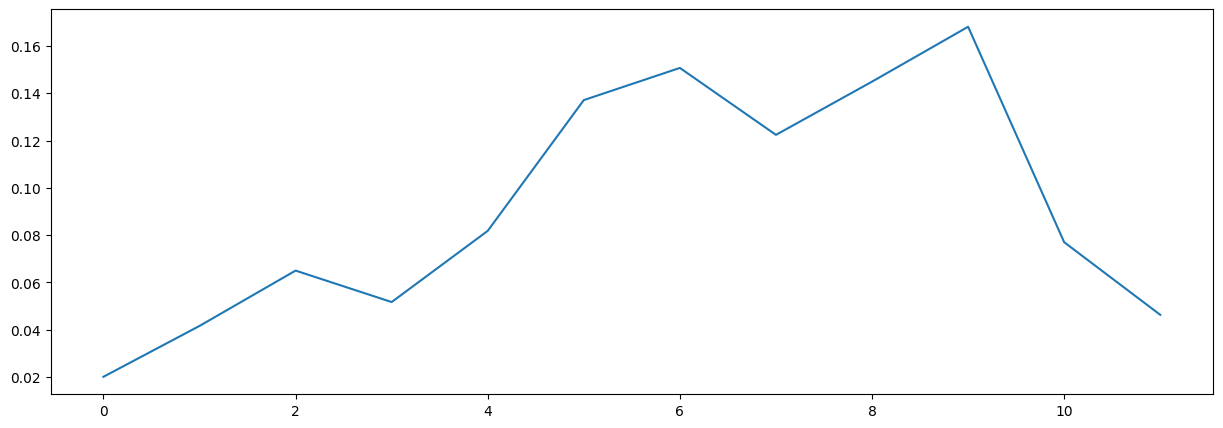

In [ ]:
import matplotlib.pyplot as plt
myval = val
fig, ax = plt.subplots(1,1, figsize=(15,5))
plt.plot( myval )

open one greyscale image

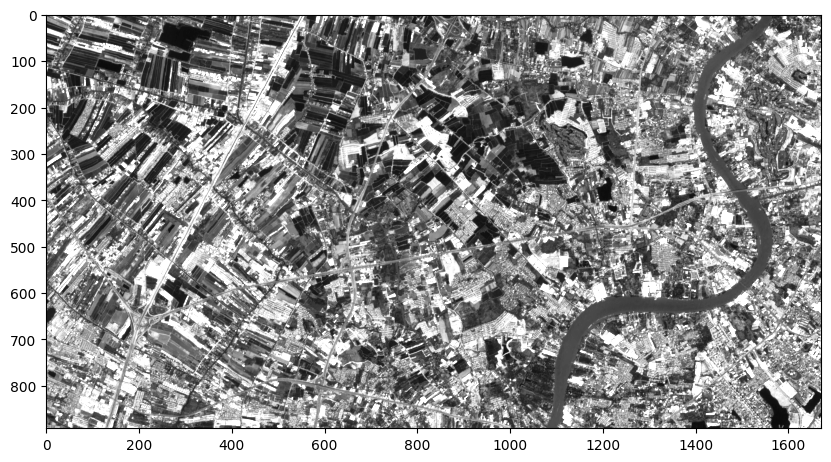

In [ ]:
fig,ax = plt.subplots(1,1, figsize=(10,20))
plt.imshow(img[3], cmap='Greys_r', vmin=0, vmax=0.2)

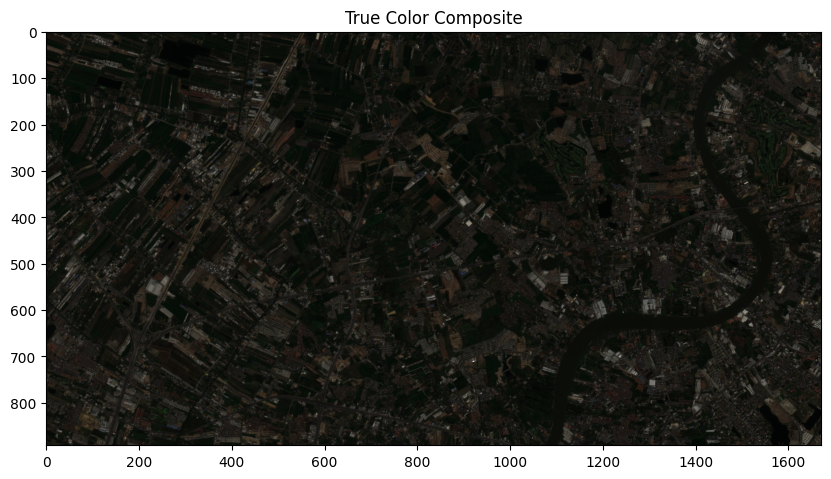

<Axes: title={'center': 'True Color Composite'}>

In [ ]:
from rasterio.plot import show, adjust_band
RGB = img[[3,2,1],:,:]
#RGB_norm = adjust_band(RGB)

fig,ax = plt.subplots(1,1, figsize=(10,20))
ax.set_title('True Color Composite')
show( RGB , vmin=0, vmax=0.2)

/usr/local/lib/python3.10/dist-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


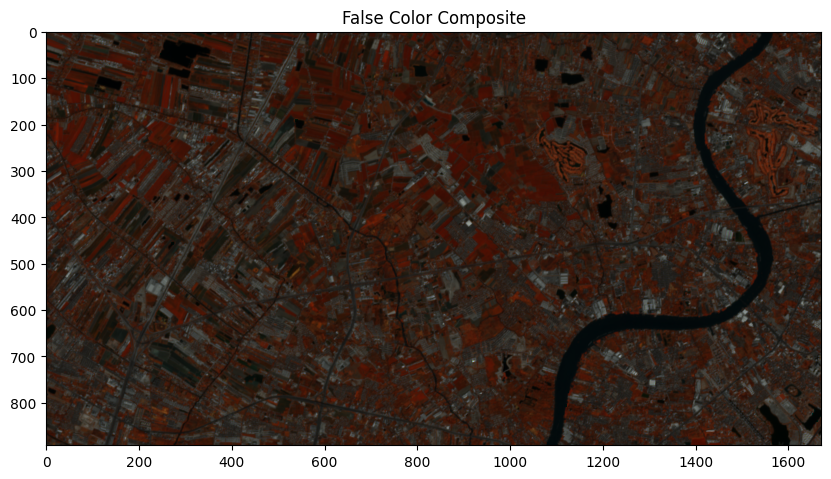

<Axes: title={'center': 'False Color Composite'}>

In [ ]:
from rasterio.plot import show, adjust_band
RGB = img[[5,4,3],:,:]
#RGB_norm = adjust_band(RGB)

fig,ax = plt.subplots(1,1, figsize=(10,25))
ax.set_title('False Color Composite')
show( RGB , vmin=0, vmax=0.2 )

import sample point

0 - building and artificial place

1 - agriculture

2 - water

In [ ]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/lookmeebbear/OpenRS_LDDTNI/main/landcover_samplepoint.csv')
df

,X,Y,class
0,100.533771,13.924564,0
1,100.516601,13.935989,0
2,100.511406,13.930158,0
3,100.512136,13.922949,0
4,100.542498,13.934334,0
...,...,...,...
175,100.439966,13.932960,2
176,100.435115,13.940927,2
177,100.415455,13.947197,2
178,100.429210,13.947346,2


In [ ]:
df['value'] = [ x for x in myimg.sample( [(x,y) for x,y in zip(df.X, df.Y)] ) ]
df

,X,Y,class,value
0,100.533771,13.924564,0,"[0.0732, 0.0964, 0.1042, 0.1138, 0.1337, 0.156..."
1,100.516601,13.935989,0,"[0.0864, 0.1126, 0.1388, 0.1416, 0.1728, 0.190..."
2,100.511406,13.930158,0,"[0.0656, 0.1138, 0.1264, 0.1282, 0.1298, 0.151..."
3,100.512136,13.922949,0,"[0.0583, 0.0692, 0.0832, 0.116, 0.1399, 0.1606..."
4,100.542498,13.934334,0,"[0.0656, 0.1086, 0.0971, 0.0872, 0.1165, 0.128..."
...,...,...,...,...
175,100.439966,13.932960,2,"[0.0203, 0.0357, 0.0559, 0.0428, 0.0617, 0.018..."
176,100.435115,13.940927,2,"[0.0218, 0.0208, 0.0281, 0.0213, 0.0382, 0.039..."
177,100.415455,13.947197,2,"[0.0165, 0.0194, 0.02, 0.0095, 0.0127, 0.0153,..."
178,100.429210,13.947346,2,"[0.0172, 0.016, 0.0206, 0.0142, 0.025, 0.0115,..."


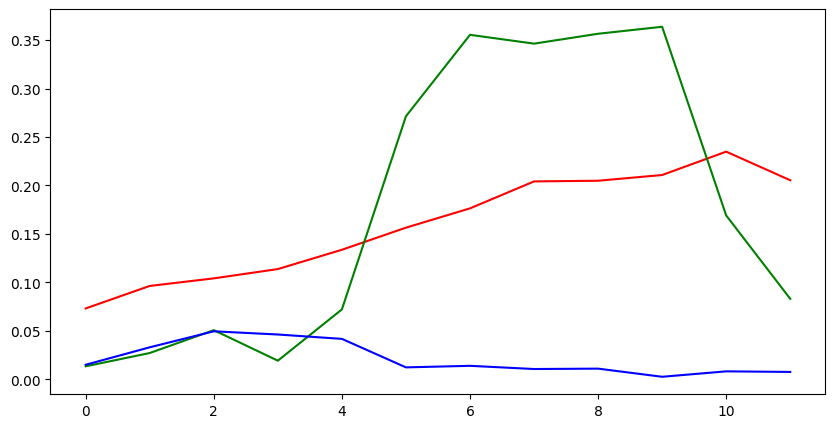

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.plot( ( df.iloc[0] ).value , color='red' )
ax.plot( ( df.iloc[60] ).value , color='green')
ax.plot( ( df.iloc[124] ).value , color='blue' )


In [ ]:
mycol = [i for i in range(myimg.count) ]
df[ mycol ] = [x for x in list( df.value )]

In [ ]:
df

,X,Y,class,value,0,1,2,3,4,5,6,7,8,9,10,11
0,100.533771,13.924564,0,"[0.0732, 0.0964, 0.1042, 0.1138, 0.1337, 0.156...",0.0732,0.0964,0.1042,0.1138,0.1337,0.1565,0.1764,0.2042,0.2049,0.2108,0.2349,0.2054
1,100.516601,13.935989,0,"[0.0864, 0.1126, 0.1388, 0.1416, 0.1728, 0.190...",0.0864,0.1126,0.1388,0.1416,0.1728,0.1904,0.2118,0.2098,0.2212,0.2274,0.2982,0.2980
2,100.511406,13.930158,0,"[0.0656, 0.1138, 0.1264, 0.1282, 0.1298, 0.151...",0.0656,0.1138,0.1264,0.1282,0.1298,0.1510,0.1690,0.1698,0.1772,0.1617,0.2792,0.2677
3,100.512136,13.922949,0,"[0.0583, 0.0692, 0.0832, 0.116, 0.1399, 0.1606...",0.0583,0.0692,0.0832,0.1160,0.1399,0.1606,0.1760,0.1971,0.1875,0.1818,0.2688,0.2481
4,100.542498,13.934334,0,"[0.0656, 0.1086, 0.0971, 0.0872, 0.1165, 0.128...",0.0656,0.1086,0.0971,0.0872,0.1165,0.1280,0.1516,0.1569,0.1764,0.1824,0.2901,0.2857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,100.439966,13.932960,2,"[0.0203, 0.0357, 0.0559, 0.0428, 0.0617, 0.018...",0.0203,0.0357,0.0559,0.0428,0.0617,0.0183,0.0198,0.0302,0.0161,0.0510,0.0157,0.0108
176,100.435115,13.940927,2,"[0.0218, 0.0208, 0.0281, 0.0213, 0.0382, 0.039...",0.0218,0.0208,0.0281,0.0213,0.0382,0.0391,0.0298,0.0377,0.0336,0.1405,0.0214,0.0196
177,100.415455,13.947197,2,"[0.0165, 0.0194, 0.02, 0.0095, 0.0127, 0.0153,...",0.0165,0.0194,0.0200,0.0095,0.0127,0.0153,0.0110,0.0194,0.0197,0.2307,0.0174,0.0153
178,100.429210,13.947346,2,"[0.0172, 0.016, 0.0206, 0.0142, 0.025, 0.0115,...",0.0172,0.0160,0.0206,0.0142,0.0250,0.0115,0.0128,0.0148,0.0078,0.1146,0.0114,0.0113


In [ ]:
df.iloc[120]

X                                               100.499518
Y                                                13.927508
class                                                    2
value    [0.0187, 0.0345, 0.0521, 0.0477, 0.0407, 0.010...
0                                                   0.0187
1                                                   0.0345
2                                                   0.0521
3                                                   0.0477
4                                                   0.0407
5                                                   0.0107
6                                                   0.0129
7                                                    0.008
8                                                   0.0068
9                                                      NaN
10                                                  0.0048
11                                                  0.0056
Name: 120, dtype: object

In [ ]:
df = df.dropna()
df

,X,Y,class,value,0,1,2,3,4,5,6,7,8,9,10,11
0,100.533771,13.924564,0,"[0.0732, 0.0964, 0.1042, 0.1138, 0.1337, 0.156...",0.0732,0.0964,0.1042,0.1138,0.1337,0.1565,0.1764,0.2042,0.2049,0.2108,0.2349,0.2054
1,100.516601,13.935989,0,"[0.0864, 0.1126, 0.1388, 0.1416, 0.1728, 0.190...",0.0864,0.1126,0.1388,0.1416,0.1728,0.1904,0.2118,0.2098,0.2212,0.2274,0.2982,0.2980
2,100.511406,13.930158,0,"[0.0656, 0.1138, 0.1264, 0.1282, 0.1298, 0.151...",0.0656,0.1138,0.1264,0.1282,0.1298,0.1510,0.1690,0.1698,0.1772,0.1617,0.2792,0.2677
3,100.512136,13.922949,0,"[0.0583, 0.0692, 0.0832, 0.116, 0.1399, 0.1606...",0.0583,0.0692,0.0832,0.1160,0.1399,0.1606,0.1760,0.1971,0.1875,0.1818,0.2688,0.2481
4,100.542498,13.934334,0,"[0.0656, 0.1086, 0.0971, 0.0872, 0.1165, 0.128...",0.0656,0.1086,0.0971,0.0872,0.1165,0.1280,0.1516,0.1569,0.1764,0.1824,0.2901,0.2857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,100.439966,13.932960,2,"[0.0203, 0.0357, 0.0559, 0.0428, 0.0617, 0.018...",0.0203,0.0357,0.0559,0.0428,0.0617,0.0183,0.0198,0.0302,0.0161,0.0510,0.0157,0.0108
176,100.435115,13.940927,2,"[0.0218, 0.0208, 0.0281, 0.0213, 0.0382, 0.039...",0.0218,0.0208,0.0281,0.0213,0.0382,0.0391,0.0298,0.0377,0.0336,0.1405,0.0214,0.0196
177,100.415455,13.947197,2,"[0.0165, 0.0194, 0.02, 0.0095, 0.0127, 0.0153,...",0.0165,0.0194,0.0200,0.0095,0.0127,0.0153,0.0110,0.0194,0.0197,0.2307,0.0174,0.0153
178,100.429210,13.947346,2,"[0.0172, 0.016, 0.0206, 0.0142, 0.025, 0.0115,...",0.0172,0.0160,0.0206,0.0142,0.0250,0.0115,0.0128,0.0148,0.0078,0.1146,0.0114,0.0113


Welcome to Machine Learning !!!!

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
df_play = df.copy()

In [ ]:
listband = [1,2,3]

In [ ]:
x = df_play[ listband ]
y = df_play[ 'class' ]

In [ ]:
x

,1,2,3
0,0.0964,0.1042,0.1138
1,0.1126,0.1388,0.1416
2,0.1138,0.1264,0.1282
3,0.0692,0.0832,0.1160
4,0.1086,0.0971,0.0872
...,...,...,...
175,0.0357,0.0559,0.0428
176,0.0208,0.0281,0.0213
177,0.0194,0.0200,0.0095
178,0.0160,0.0206,0.0142


In [ ]:
y

0      0
1      0
2      0
3      0
4      0
      ..
175    2
176    2
177    2
178    2
179    2
Name: class, Length: 177, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( x, y,
                                                     test_size=0.5,
                                                    random_state=42)

In [ ]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
y_true = y_test.to_numpy()
y_true

array([0, 0, 2, 0, 1, 0, 1, 2, 1, 2, 0, 2, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 2, 2, 1, 1, 1, 0, 0, 2, 2, 0, 0, 0, 2, 2, 1, 2, 0, 1, 1, 1,
       2, 0, 1, 2, 2, 0, 1, 0, 0, 2, 2, 1, 1, 0, 1, 0, 2, 1, 1, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 1, 0, 2, 2, 0, 2, 2, 1, 0, 1, 0, 0, 2, 0, 0, 2,
       1])

In [ ]:
y_pred

array([0, 0, 2, 1, 1, 0, 2, 2, 1, 2, 0, 2, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 2, 1, 1, 2, 2, 1, 1, 0, 2, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 0,
       2, 0, 2, 1, 2, 0, 1, 0, 0, 2, 2, 1, 2, 0, 1, 0, 1, 1, 2, 2, 0, 0,
       0, 2, 0, 0, 1, 2, 1, 0, 1, 2, 0, 2, 1, 1, 0, 1, 0, 0, 2, 1, 1, 2,
       2])

In [ ]:
confusion_matrix(y_true, y_pred)

array([[28,  5,  0],
       [ 3, 18,  8],
       [ 1,  6, 20]])

In [ ]:
print( classification_report(y_true, y_pred) )

              precision    recall  f1-score   support

           0       0.88      0.85      0.86        33
           1       0.62      0.62      0.62        29
           2       0.71      0.74      0.73        27

    accuracy                           0.74        89
   macro avg       0.74      0.74      0.74        89
weighted avg       0.74      0.74      0.74        89



In [ ]:
clf.classes_

array([0, 1, 2])

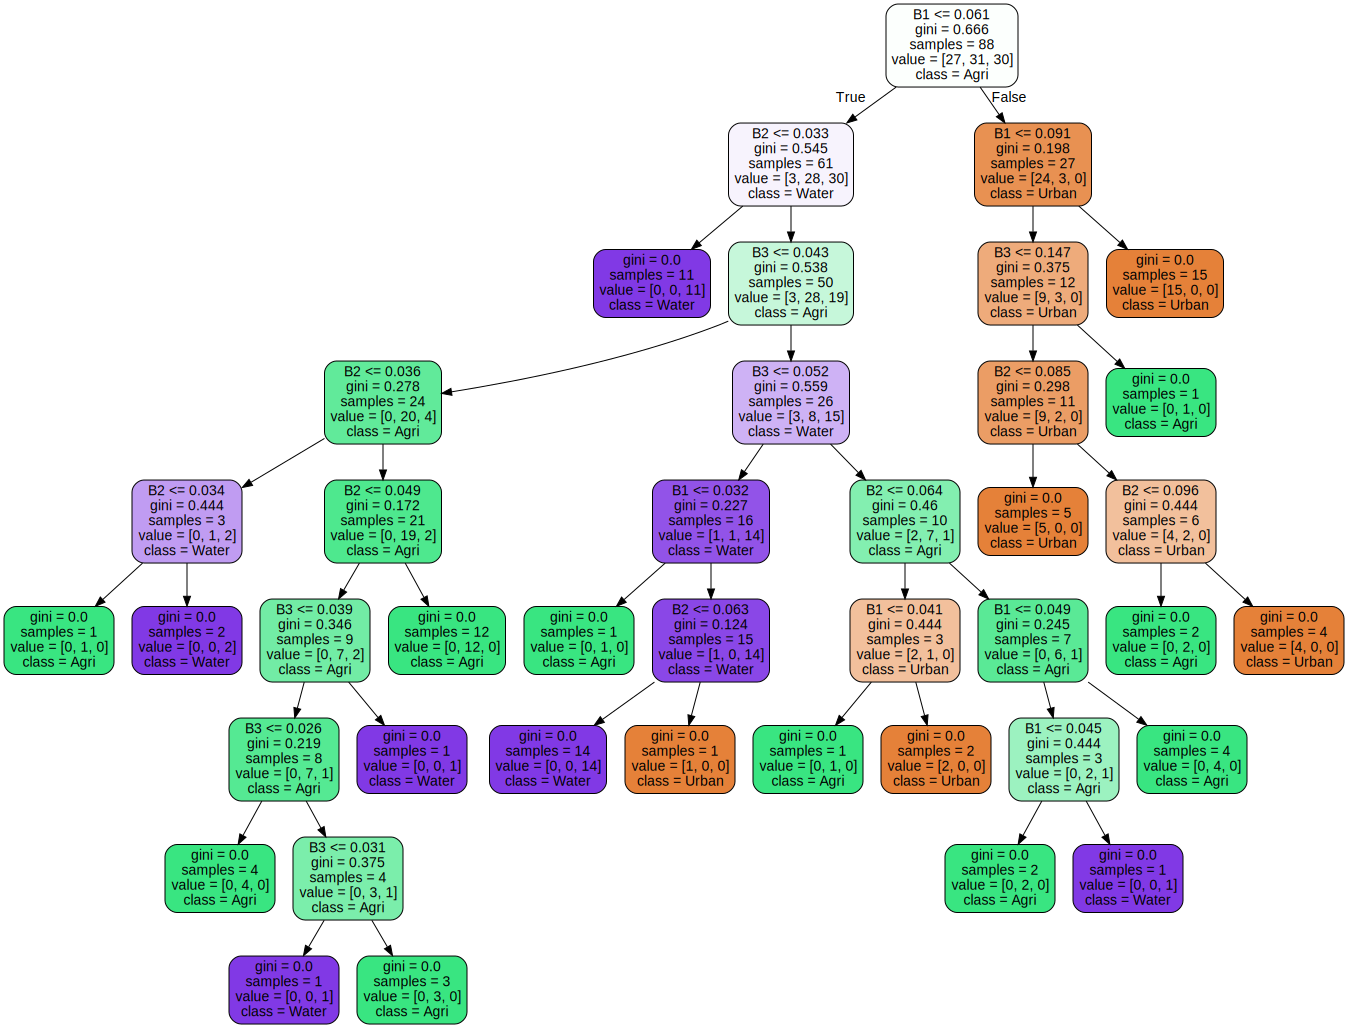

In [ ]:
import graphviz

# str(list(clf.classes_)[0]), str(list(clf.classes_)[1]), str(list(clf.classes_)[2])
dot_data = tree.export_graphviz(clf, feature_names=['B'+str(i) for i in listband] ,
                                class_names=['Urban','Agri','Water'],
                                filled=True,
                                rounded=True)
graph = graphviz.Source(dot_data)
graph

In [ ]:
import pickle
pickle.dump(clf, open('mymodel.pkl','wb') )

In [ ]:
loaded_model = pickle.load(open('mymodel.pkl', 'rb'))

In [ ]:
loaded_model.predict(X_train)

array([1, 1, 0, 1, 1, 2, 2, 2, 0, 1, 2, 2, 1, 1, 0, 2, 2, 2, 1, 2, 1, 1,
       1, 0, 0, 2, 0, 2, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2, 2, 1,
       0, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 2,
       2, 0, 2, 2, 0, 0, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 0, 1, 1, 0, 1, 1])

In [ ]:
old_image = '/content/drive/MyDrive/GeoAI_DOL/sentinel2.tif'
new_image = '/content/myclassy.tif'

In [ ]:
import numpy as np
with rio.open(old_image,'r') as src:
  profile = src.profile
  profile.update( dtype=rio.uint8, count=1 )
  # row shape0, col shape1
  print(src.shape[0], src.shape[1])
  with rio.open(new_image, 'w', **profile) as dst:
    data = src.read([j+1 for j in listband])
    print( data.shape )
    img_swp = np.moveaxis(data, 0, 2 )
    print( img_swp.shape )
    img_flat = img_swp.reshape(-1, img_swp.shape[-1])
    print( img_flat.shape )
    img_preds = loaded_model.predict(img_flat)
    print( img_preds )
    print( img_preds.shape )

    output = img_preds.reshape(*img_swp.shape[:-1])
    dst.write( output.astype(rio.uint8) , 1)

892 1671
(3, 892, 1671)
(892, 1671, 3)
(1490532, 3)
[0 0 0 ... 0 0 0]
(1490532,)


In [ ]:
out = rio.open(new_image)

In [ ]:
classy_img = out.read()

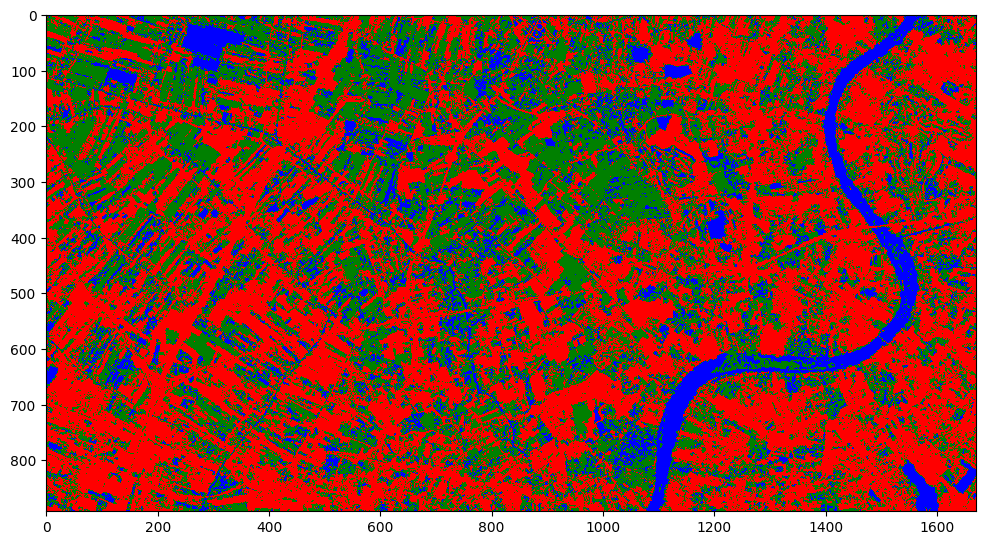

In [ ]:
from matplotlib import colors
fig,ax = plt.subplots(1,1, figsize=(12,24))

cmap = colors.ListedColormap(['red','green','blue'])
#bounds=[-0.5,0.5,1.5]
norm = colors.BoundaryNorm(bounds, cmap.N)


plt.imshow(classy_img[0], cmap=cmap )